In [16]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

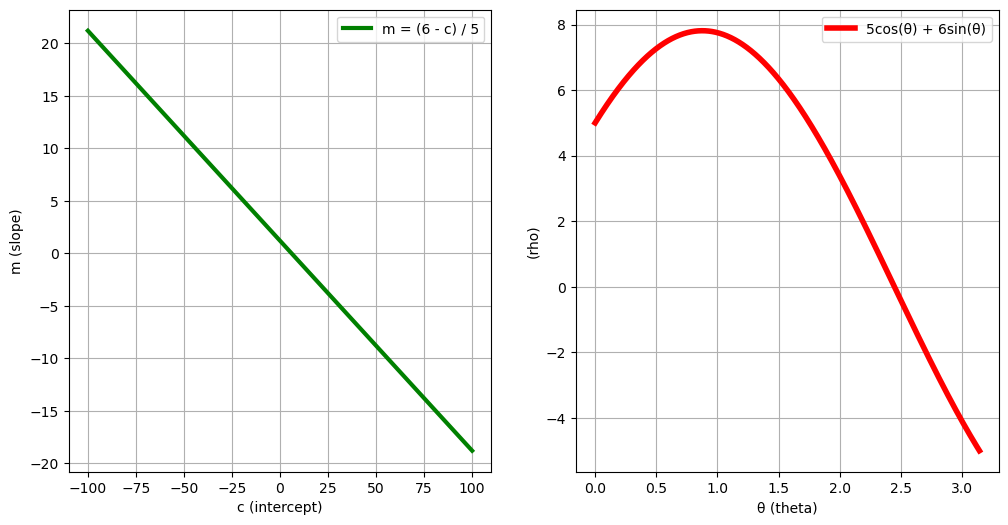

In [17]:
c = np.linspace(-100, 100, 1000)
theta = np.linspace(0, np.pi, 1000)

m = (6 - c) / 5
rho = 5 * np.cos(theta) + 6 * np.sin(theta)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(c, m, 'green', label='m = (6 - c) / 5', linewidth=3)
axs[0].set(xlabel='c (intercept)', ylabel='m (slope)')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(theta, rho, 'red', label='5cos(θ) + 6sin(θ)', linewidth=4)
axs[1].set(xlabel='θ (theta)', ylabel='(rho)')
axs[1].legend()
axs[1].grid(True)

plt.show()

In [18]:
def show_img_plt(img, title='', cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [19]:
def show_mult_img(rows, columns, img_names, titles, vmin=0, vmax=255):
    fig = plt.figure(figsize=(16, 14), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], cmap='gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title(titles[i])

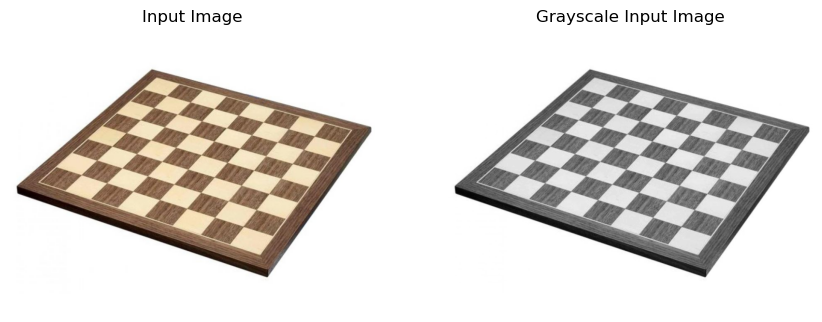

In [20]:
# Read the image
input_image = cv2.imread('media/a.jpg', cv2.IMREAD_UNCHANGED)

# Convert color from BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Convert the image to grayscale
input_image_gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Display images
show_mult_img(1, 3, [input_image_rgb, input_image_gray], ['Input Image', 'Grayscale Input Image'])


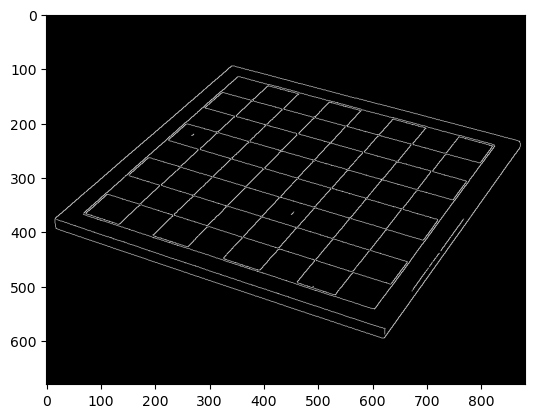

In [21]:
input_image=cv2.imread('media/a.jpg')
input_image_gray=cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
img_blur=cv2.GaussianBlur(input_image_gray,(3,3),0)

edges_image_gray=cv2.Canny(img_blur,150,200,3)
plt.imshow(edges_image_gray,cmap='gray')

In [22]:
lines= cv2.HoughLines(edges_image_gray,1,np.pi/180,180)

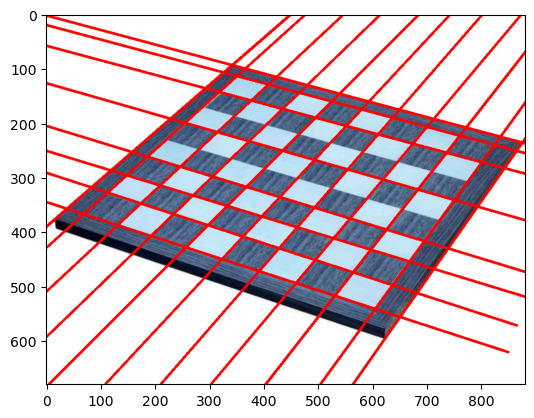

In [23]:
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho

    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))

    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    
    cv2.line(input_image,(x1,y1),(x2,y2),(255,0,0),3)
plt.imshow(input_image)

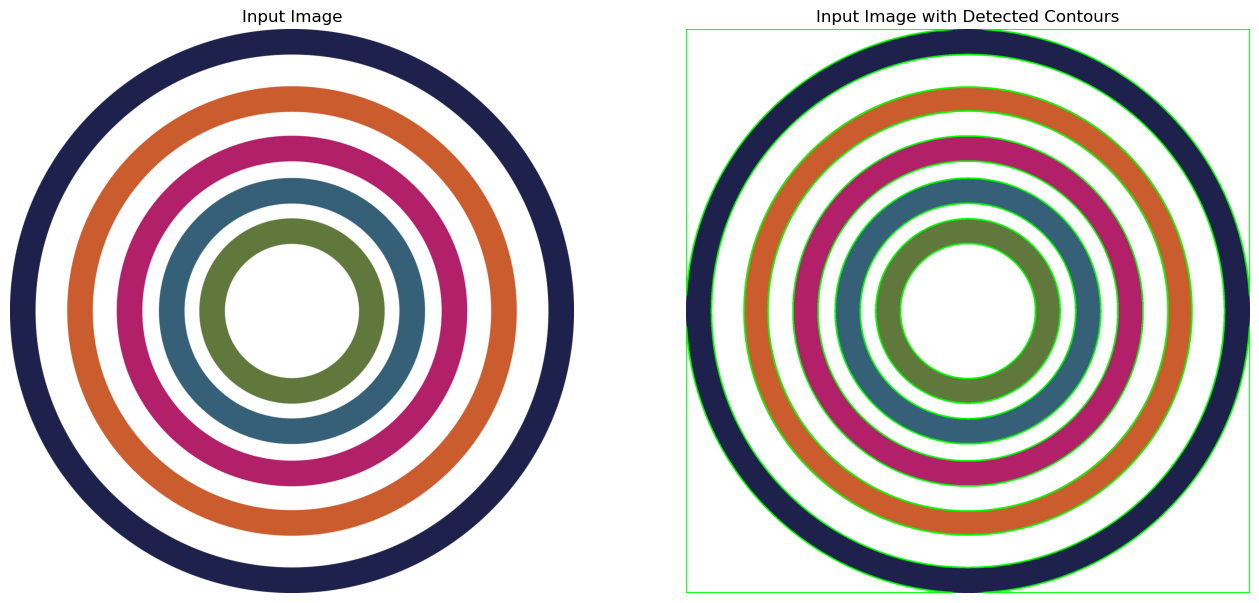

In [24]:
# Read the image
input_image = cv2.imread('media/b.jpg', cv2.IMREAD_UNCHANGED)

# Convert color from BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Denoise with Gaussian
gray = cv2.GaussianBlur(gray, (9, 9), 2)

# Threshold the image
ret, thresh = cv2.threshold(gray, 120, 255, cv2.THRESH_BINARY)

# Find contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Make a copy of the input image
output_image = input_image_rgb.copy()

# Draw contours on the output image
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 6)

# Display the images
show_mult_img(1, 2, [input_image_rgb, output_image], 
                     ['Input Image', 'Input Image with Detected Contours'])


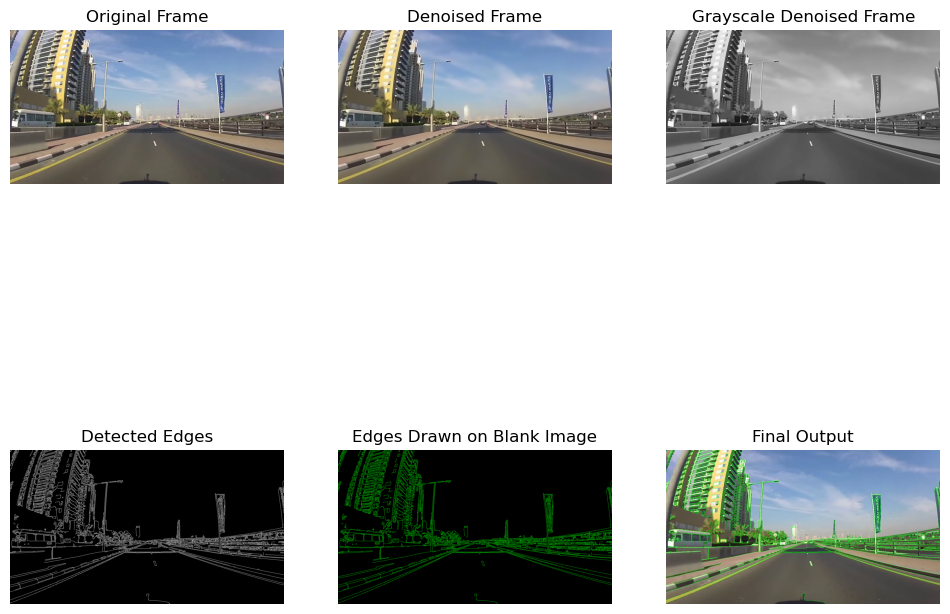

In [40]:
# Open the video file
video_cap = cv2.VideoCapture('media/lane.mp4')

frameNr = 1
while True:
    ret, frame = video_cap.read()
    if not ret:
        print("Can't retrieve frame!")
        break
    if frameNr == 8:
        frame_8 = frame
        break
    frameNr += 1

video_cap.release()

# Convert the color of the 8th frame from BGR to RGB
frame_8_rgb = cv2.cvtColor(frame_8, cv2.COLOR_BGR2RGB)

# Denoise the frame using Non-local Means Denoising
denoised_frame = cv2.fastNlMeansDenoisingColored(frame_8_rgb, None, 10, 10, 7, 21)

# Convert the denoised frame to grayscale
gray_frame = cv2.cvtColor(denoised_frame, cv2.COLOR_RGB2GRAY)

# Detect edges using Canny edge detection
edges = cv2.Canny(gray_frame, 50, 150)

# Create a blank image with the same size as the original frame
blank_image = np.zeros_like(frame_8_rgb)

# Draw the detected edges on the blank image in green color
blank_image[edges != 0] = (0, 255, 0)  # Green color

# Create a copy of the original frame
output_frame = np.copy(frame_8_rgb)

# Replace the corresponding pixels in the copy of the original frame with green color where edges are detected
output_frame[edges != 0] = (0, 255, 0)  # Green color

# Display the frames in different stages of processing
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(frame_8_rgb)
plt.title('Original Frame')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(denoised_frame)
plt.title('Denoised Frame')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(gray_frame, cmap='gray')
plt.title('Grayscale Denoised Frame')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(edges, cmap='gray')
plt.title('Detected Edges')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(blank_image)
plt.title('Edges Drawn on Blank Image')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(output_frame)
plt.title('Final Output')
plt.axis('off')

plt.show()
